In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('D:/10 Academy/Week1/Data/yfinance_data/Concatenated_Data.csv')
dataset1= pd.read_csv('D:/10 Academy/Week1/Data/labeled_and_processed_dataset.csv')

In [3]:
print("Shape of dataset1:", dataset.shape)
print("Shape of dataset2:", dataset1.shape)

Shape of dataset1: (45428, 10)
Shape of dataset2: (1407327, 13)


In [4]:
dataset1['date'] = pd.to_datetime(dataset1['date']).dt.date
dataset1.rename(columns={'date': 'Date'}, inplace=True)

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [6]:
dataset = dataset[['Date', 'Close', 'stock']]
dataset1 = dataset1[['Date', 'headline', 'sentiment_label']]

In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset1['Date'] = pd.to_datetime(dataset1['Date'])

In [8]:
# Join datasets on 'Date' column
merged_df = pd.merge(dataset1, dataset, on='Date', how='inner')

In [9]:
merged_df.to_csv('D:/10 Academy/Week1/Data/merged.csv', index=False)

In [10]:
dataset = pd.read_csv('D:/10 Academy/Week1/Data/merged.csv')

In [11]:
dataset.shape

(9287932, 5)

In [12]:
dataset.columns

Index(['Date', 'headline', 'sentiment_label', 'Close', 'stock'], dtype='object')

In [13]:
#Calculate Daily Stock Returns  sentiment_label

In [14]:
dataset['Daily_Return'] = dataset.groupby('stock')['Close'].pct_change() * 100
dataset = dataset.dropna(subset=['Daily_Return'])
print(dataset[['Date', 'stock', 'Close', 'sentiment_label','Daily_Return']].head(100))

           Date   stock       Close sentiment_label  Daily_Return
7    2020-06-05   Apple   82.875000         Neutral           0.0
8    2020-06-05    Amzn  124.150002         Neutral           0.0
9    2020-06-05  Google   71.919502         Neutral           0.0
10   2020-06-05    Meta  230.770004         Neutral           0.0
11   2020-06-05    Msft  187.199997         Neutral           0.0
..          ...     ...         ...             ...           ...
102  2020-06-05    Msft  187.199997         Neutral           0.0
103  2020-06-05  Nvidia    8.920000         Neutral           0.0
104  2020-06-05    Tsla   59.043999         Neutral           0.0
105  2020-06-05   Apple   82.875000         Neutral           0.0
106  2020-06-05    Amzn  124.150002         Neutral           0.0

[100 rows x 5 columns]


In [15]:
#Aggregate Sentiments

In [16]:
sentiment_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': -1}
dataset['Sentiment_Score'] = dataset['sentiment_label'].map(sentiment_mapping)
dataset = dataset.dropna(subset=['Sentiment_Score'])
daily_sentiment = dataset.groupby(['Date', 'stock'])['Sentiment_Score'].mean().reset_index()
print(daily_sentiment.head(100))


          Date   stock  Sentiment_Score
0   2009-04-27    Amzn              0.0
1   2009-04-27   Apple              0.0
2   2009-04-27  Google              0.0
3   2009-04-27    Msft              0.0
4   2009-04-27  Nvidia              0.0
..         ...     ...              ...
95  2009-07-15    Amzn              0.0
96  2009-07-15   Apple              0.0
97  2009-07-15  Google              0.0
98  2009-07-15    Msft              0.0
99  2009-07-15  Nvidia              0.0

[100 rows x 3 columns]


In [17]:
print(daily_sentiment.head(100))

          Date   stock  Sentiment_Score
0   2009-04-27    Amzn              0.0
1   2009-04-27   Apple              0.0
2   2009-04-27  Google              0.0
3   2009-04-27    Msft              0.0
4   2009-04-27  Nvidia              0.0
..         ...     ...              ...
95  2009-07-15    Amzn              0.0
96  2009-07-15   Apple              0.0
97  2009-07-15  Google              0.0
98  2009-07-15    Msft              0.0
99  2009-07-15  Nvidia              0.0

[100 rows x 3 columns]


In [18]:
daily_data = dataset[['Date', 'stock', 'Daily_Return']].dropna().drop_duplicates()
merged_data = pd.merge(daily_data, daily_sentiment, on=['Date', 'stock'])
print(merged_data.head())

         Date   stock  Daily_Return  Sentiment_Score
0  2020-06-05   Apple           0.0         0.625134
1  2020-06-05    Amzn           0.0         0.625134
2  2020-06-05  Google           0.0         0.625134
3  2020-06-05    Meta           0.0         0.625134
4  2020-06-05    Msft           0.0         0.625134


In [19]:
print(merged_data.head(100))

          Date   stock  Daily_Return  Sentiment_Score
0   2020-06-05   Apple      0.000000         0.625134
1   2020-06-05    Amzn      0.000000         0.625134
2   2020-06-05  Google      0.000000         0.625134
3   2020-06-05    Meta      0.000000         0.625134
4   2020-06-05    Msft      0.000000         0.625134
..         ...     ...           ...              ...
95  2020-05-08  Google      1.105459         0.140237
96  2020-05-08  Google      0.000000         0.140237
97  2020-05-08    Meta      0.697079         0.140237
98  2020-05-08    Meta      0.000000         0.140237
99  2020-05-08    Msft      0.829869         0.140237

[100 rows x 4 columns]


In [20]:
#Calculate Correlation

In [22]:
correlation = merged_data.groupby('stock').apply(
    lambda x: x[['Sentiment_Score', 'Daily_Return']].corr().iloc[0, 1]
)

print(correlation)

stock
Amzn     -0.006555
Apple    -0.005868
Google   -0.010844
Meta     -0.033162
Msft     -0.026461
Nvidia   -0.017330
Tsla     -0.008083
dtype: float64


In [23]:
correlation = merged_data['Daily_Return'].corr(merged_data['Sentiment_Score'])
print("Pearson correlation:", correlation)

Pearson correlation: -0.011452899433269534


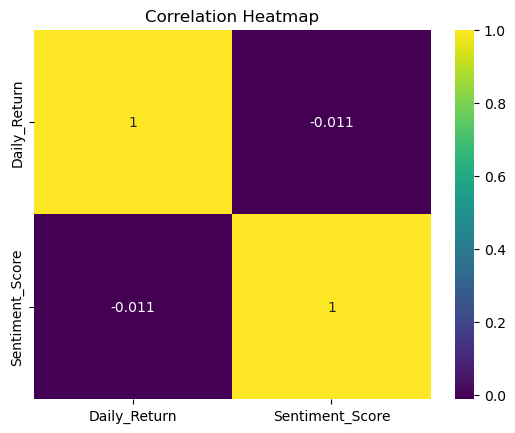

In [24]:
# Create a heatmap
sns.heatmap(merged_data[['Daily_Return', 'Sentiment_Score']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

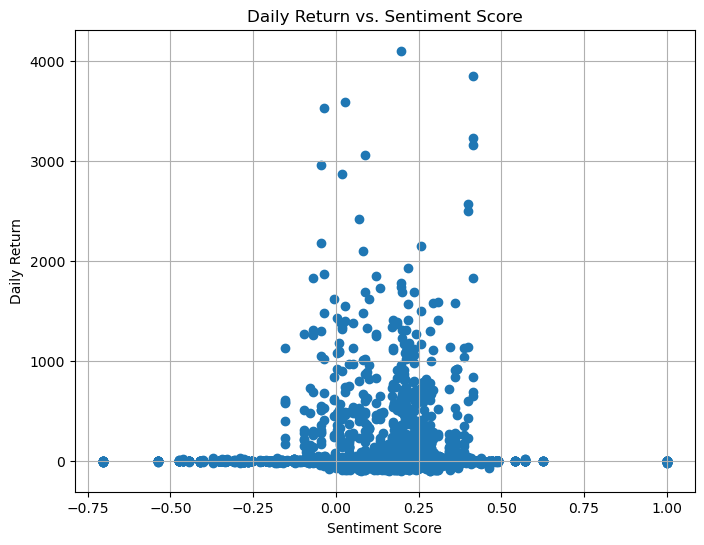

In [25]:
# Select the columns
daily_return = merged_data['Daily_Return']
sentiment_score = merged_data['Sentiment_Score']
plt.scatter(sentiment_score, daily_return)
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Daily Return vs. Sentiment Score')
plt.grid(True)
plt.show()